# What are the prevailing sentiments among Reddit users concerning the historically high U.S. national debt in 2024?

# Introduction


---

The U.S. federal debt has grown significantly over the past century, increasing from 394 billion USD in 1924 to an unprecedented $35.46 trillion in 2024. This staggering growth reflects decades of economic crises, fiscal strategies, and policy decisions aimed at managing short-term economic challenges while often neglecting long-term sustainability. Key events, such as the Great Depression, World War II, and more recently the COVID-19 pandemic, have necessitated large-scale government spending, adding to the debt burden. As the debt reaches historic levels, concerns about its long-term implications for the economy, government operations, and societal well-being have become increasingly prominent in public discourse. In this context, understanding public sentiment about the U.S. national debt is crucial. Platforms like Reddit have emerged as significant arenas for discussions on pressing economic issues, offering diverse and candid perspectives. Analyzing public discourse on such platforms can provide insights into how people perceive the sustainability of the national debt, their level of understanding of fiscal policy, and their concerns about its potential impact on future economic stability. These insights are vital, as public opinion often reflects broader societal attitudes and can influence policy debates. This project aims to analyze the sentiment and discourse surrounding the U.S. national debt on Reddit. By examining how users engage with this topic, we seek to uncover prevailing attitudes and identify recurring themes in public discussions. This analysis will contribute to a deeper understanding of public engagement with complex economic issues and how such discussions shape broader perceptions of fiscal responsibility.

# Research Question

---


What are the prevailing sentiments among Reddit users concerning the historically high U.S. national debt in 2024?

# Hypothesis

---


Discussions on Reddit reflect significant concern about the sustainability of high national debt levels. While some users may express nuanced understanding or acceptance of the debt as a necessary economic tool, the majority are expected to voice apprehensions about its long-term impact on economic stability and government policy.


# Relevance and Importance

---


Understanding public sentiment about the national debt can provide policymakers, economists, and educators with valuable insights into societal attitudes and knowledge trends. These insights are essential for developing better communication strategies, educational initiatives, and policy approaches that address public concerns and misconceptions. Public perception of the national debt, often shaped by media narratives and personal economic experiences, plays a significant role in framing how fiscal policies are received and debated.
By analyzing Reddit discussions, this project will shed light on how the national debt is understood and discussed by a diverse range of users. The findings will reveal patterns in public engagement, helping policymakers refine their outreach efforts and enabling educators to target knowledge gaps. Ultimately, this analysis aims to enhance comprehension of public discourse, offering actionable insights for fostering informed policymaking and effective communication strategies.


# Data Collection

---


To analyze public sentiment and discourse surrounding the U.S. national debt, Reddit was selected as the primary source for data collection. Reddit is a widely-used platform that facilitates discussions on diverse topics, including economic policies, making it an ideal choice for this study. Specifically, data was extracted from the subreddit r/Economics, a forum known for its in-depth discussions on fiscal and economic issues.
1. **Data Sources:** Posts and comments discussing the U.S. national debt were collected from r/Economics. The subreddit was chosen for its active user base and focus on economics-related topics, ensuring a rich dataset. A specific thread discussing the record-high $36 trillion U.S. national debt served as a primary source of data. This targeted approach ensured that the dataset was directly aligned with the research objectives.
2. **Keywords and Phrases:** To gather discussions relevant to the U.S. national debt, a predefined set of keywords and phrases was used. Terms such as "national debt," "budget deficit," "fiscal responsibility," "economic policy," and "debt ceiling" were employed to filter and extract pertinent content. These keywords ensured that only meaningful discussions were included, avoiding unrelated or tangential data.
3. **Data Extraction Tools:** The Reddit API was used to extract structured data, including posts, comments, metadata (e.g., timestamps, user interactions), and thread contexts. The API allowed for efficient and systematic collection of text data. By specifying parameters such as keyword filters and date ranges, comprehensive coverage of discussions over relevant time periods was achieved. Care was taken to adhere to Reddit's terms of service during data extraction.


# Data Cleaning

---


The raw data collected from Reddit contained various extraneous elements such as HTML tags, hyperlinks, special characters, and metadata not needed for text analysis. Data cleaning was performed to remove these elements and prepare the dataset for further processing. Cleaning steps included:
* **HTML and Special Characters Removal:** Text was stripped of non-textual elements like HTML tags and emojis to ensure focus on meaningful content.
* **Duplicate Removal:** Duplicate posts and comments were removed to avoid redundancy in the dataset.


# Text Preprocessing

---


Once cleaned, the data underwent preprocessing to prepare it for analysis. This step involved standardizing and structuring the text to ensure compatibility with analytical tools.
1. Tokenization: The text was split into individual words or tokens, allowing for word-level analysis.
2. Normalization: All text was converted to lowercase to maintain consistency across the dataset.
3. Elimination of Stop Words: Commonly used words like "the," "is," and "and" were removed, as they do not add value to the analysis.
4. Stemming and Lemmatization: Words were reduced to their root forms to group similar words (e.g., "debts" and "debt") together for better analysis.


# Methods of Analysis

---


To gain insights into the discussions, several analytical techniques were employed. Each method was chosen to address specific aspects of the research question.
1. **TF-IDF Analysis:** Term Frequency-Inverse Document Frequency (TF-IDF) was used to identify the most important terms in the dataset. This technique highlights words that are frequent within a document but rare across all documents, helping to pinpoint key themes in the discussions.
2. **Topic Modeling:** Latent Dirichlet Allocation (LDA), a widely-used algorithm for topic modeling, was applied to uncover hidden themes in the Reddit discussions. The algorithm grouped related terms into topics, revealing the primary areas of focus in the public discourse about the U.S. national debt.
3. **Sentiment Analysis:** Sentiment analysis was conducted using VADER (Valence Aware Dictionary and sEntiment Reasoner), a lexicon-based tool specifically designed for social media text. VADER quantified the polarity of the sentiments expressed in the discussions, categorizing them as positive, negative, or neutral. This step provided insights into public attitudes toward the national debt.
4. **Result Visualization:** Data visualization tools were employed to present findings in a clear and engaging manner. Word clouds were created to showcase the most frequently used terms in the dataset, while bar charts and pie charts illustrated sentiment distributions and topic proportions.


# Disclaimer:

---


Some of the Python code scripts used in this project were generated with the assistance of OpenAI's ChatGPT. The scripts were reviewed, modified, and implemented to suit the specific requirements of this analysis. While ChatGPT provided initial guidance and code structure, all final coding decisions, testing, and refinements were performed by the project author.

# Results

### Data Collection
---

In [ ]:
pip install praw

In [ ]:
pip install pandas

In [ ]:
pip install nltk

In [ ]:
pip install scikit-learn

In [ ]:
pip install wordcloud

In [ ]:
pip install matplotlib

In [ ]:
pip install vaderSentiment

In [ ]:
import praw
import pandas as pd
# Set up Reddit API credentials
reddit = praw.Reddit(
        client_id='X2ZMDNUWtOyplqN-klC22w',
        client_secret='szSbm4UyKvAEtuz9Zs0qF-CfX-rpag',
        user_agent='Script by Yilin',
    )

# Fetch Reddit data
submission = reddit.submission(url="https://www.reddit.com/r/Economics/comments/1gy4p5p/us_national_debt_hits_a_new_record_36_trillion/")
submission.comments.replace_more(limit=None)  # Fetch all comments
comments_data = [{
    "comment_id": comment.id,
    "author": str(comment.author),  # Convert author object to string to avoid issues if author is None
    "date": pd.to_datetime(comment.created_utc, unit='s'),  # Convert timestamp to datetime
    "comment": comment.body,
    "score": comment.score,
} for comment in submission.comments.list()]

# Convert to DataFrame
df = pd.DataFrame(comments_data)

# Save raw comments to CSV
df.to_csv("raw_comments.csv", index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

### Data Cleaning

---

In [ ]:
# Load Data
data_file = "raw_comments.csv"
df = pd.read_csv(data_file)

In [ ]:
df

,comment_id,author,date,comment,score
0,lylsjmy,AutoModerator,2024-11-23 17:20:24,"Hi all,\n\nA reminder that comments do need to...",1
1,lylu1ob,NaN,2024-11-23 17:28:28,[removed],740
2,lyltvu2,NinjaKoala,2024-11-23 17:27:37,Debt/GDP ratio was higher than 1.3 in 2020; it...,217
3,lyluzxc,NaN,2024-11-23 17:33:31,[removed],227
4,lylx2du,cleric_warlock,2024-11-23 17:44:32,"Talking about the debt like this is alarmism, ...",69
...,...,...,...,...,...
399,lywayax,Jest_out_for_a_Rip,2024-11-25 12:37:28,If only things worked that way. \n\nhttps://en...,1
400,lymb7ov,NaN,2024-11-23 18:58:56,[removed],1
401,lyxjld8,S1artibartfast666,2024-11-25 17:01:55,"yes, that makes sense, you would expect some c...",1
402,lymbhub,NaN,2024-11-23 19:00:29,[removed],1


In [ ]:
# Remove rows where the comment is '[removed]'
df_filtered = df[df['comment'] != '[removed]']

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import re

def clean_text(text):
    """Remove HTML tags, special characters, and hyperlinks from text."""
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and emojis
    text = re.sub(r'[^\w\s]', '', text)
    return text

def filter_spam(text):
    """Simple spam filter based on common spammy words (customize as needed)."""
    spam_keywords = ['subscribe', 'buy now', 'click this', 'free', 'promotion']
    if any(keyword in text.lower() for keyword in spam_keywords):
        return False
    return True

def clean_data(df):
    """Clean the DataFrame of comments."""
    # Remove HTML and special characters
    df['cleaned_text'] = df['comment'].apply(clean_text)

    # Filter out spam
    df = df[df['cleaned_text'].apply(filter_spam)]

    # Remove duplicates
    df = df.drop_duplicates(subset='cleaned_text', keep='first')

    return df

# Clean the data
df = clean_data(df_filtered)

<ipython-input-109-ac156d735e81>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['comment'].apply(clean_text)


### Text Preprocessing

---



In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
import pandas as pd
import re

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer and update stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {"could", "even", "like", "just", "will", "also","make","year","would","im","u","youre"}  # Generic terms to remove
stop_words.update(custom_stopwords)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts."""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Normalize text
    text = text.lower()

    # Remove URLs and punctuation
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_text = []
    for word in words:
        if word not in stop_words:
            lemmatized_word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
            cleaned_text.append(lemmatized_word)

    return " ".join(cleaned_text)

In [ ]:
print(df.columns)

Index(['comment_id', 'author', 'date', 'comment', 'score', 'cleaned_text'], dtype='object')


In [ ]:
df['processed_comment'] = df['cleaned_text'].apply(preprocess_text)

# Save the fully processed DataFrame to a new CSV file
df.to_csv("processed_comments.csv", index=False)

In [ ]:
df.sort_values('score', ascending=False)

,comment_id,author,date,comment,score,cleaned_text,processed_comment
2,lyltvu2,NinjaKoala,2024-11-23 17:27:37,Debt/GDP ratio was higher than 1.3 in 2020; it...,217,DebtGDP ratio was higher than 13 in 2020 its h...,debtgdp ratio high 13 2020 held fairly steady ...
103,lym6q12,StunningCloud9184,2024-11-23 18:35:07,You would have to raise taxes. If you did tha...,93,You would have to raise taxes If you did that...,raise tax held spending get 510 year never
4,lylx2du,cleric_warlock,2024-11-23 17:44:32,"Talking about the debt like this is alarmism, ...",69,Talking about the debt like this is alarmism t...,talk debt alarmism real number track percent t...
40,lym53fh,S1artibartfast666,2024-11-23 18:26:34,It was also around 1.2 during WWII. That doesn...,61,It was also around 12 during WWII That doesnt ...,around 12 wwii doesnt mean sustainable part re...
208,lyme1e6,Nickblove,2024-11-23 19:13:59,Military spending is only 13% of government sp...,53,Military spending is only 13 of government spe...,military spending 13 government spending actua...
...,...,...,...,...,...,...,...
127,lypmrd9,M0therN4ture,2024-11-24 08:15:17,You've got that backwards. The collapse of the...,-1,Youve got that backwards The collapse of the U...,youve get backwards collapse usd increase valu...
195,lym8acf,newprofile15,2024-11-23 18:43:19,Raising tax rates doesn't increase tax revenues.,-1,Raising tax rates doesnt increase tax revenues,raise tax rate doesnt increase tax revenue
32,lylxjsx,Aranthos-Faroth,2024-11-23 17:46:59,sable bear teeny abounding weary husky soup fa...,-1,sable bear teeny abounding weary husky soup fa...,sable bear teeny abound weary husky soup fade ...
214,lymkosf,StainedDrawers,2024-11-23 19:49:40,Which is reflected by the decrease in debt to ...,-1,Which is reflected by the decrease in debt to ...,reflect decrease debt gdp past 3 year


### TF-IDF Analysis

---
The TF-IDF analysis revealed insightful patterns in Reddit discussions about the U.S. national debt. The **top 20 terms** with the highest TF-IDF scores indicate the primary focus areas of the conversations. Unsurprisingly, the term “debt” had the highest TF-IDF score (14.491) and document frequency (89), reflecting its centrality to the discussion. Other highly significant terms included “tax” (11.750), “cut” (7.108), “gdp” (6.651), and “government” (6.597), suggesting that Reddit users engaged in conversations related to fiscal policies, taxation, and economic indicators. Additionally, terms like “spending,” “deficit,” “revenue,” and “trillion” highlight public concerns about government expenditure and debt sustainability.

Conversely, the **bottom 20 terms**, such as “island,” “relocate,” “prospect,” and “mental,” had extremely low TF-IDF scores (0.057) and appeared in only a single document. These terms contributed minimally to the overall discourse and may represent isolated or irrelevant mentions.

A **word cloud** visualization reinforced these findings by emphasizing the prominence of key terms like “debt,” “tax,” “gdp,” “government,” and “cut.” The relative size of words further illustrated their importance in shaping the discussion.
Overall, the results suggest that Reddit users focus primarily on core economic terms and fiscal challenges, highlighting significant public interest in national debt, taxation policies, and economic sustainability.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df['processed_comment'] = df['processed_comment'].astype(str).fillna('')

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'processed_comment' column to a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_comment'])

# Create a DataFrame for TF-IDF values
terms = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Calculate Document Frequency for each term
doc_freq = (tfidf_df > 0).sum()

# Calculate total TF-IDF score for each term across all documents
total_tfidf = tfidf_df.sum()

# Combine total TF-IDF scores with Document Frequencies
tfidf_summary = pd.DataFrame({'TF-IDF Score': total_tfidf, 'Document Frequency': doc_freq})

# Round the data to three decimal places
tfidf_summary = tfidf_summary.round(3)

# Sort by TF-IDF Score to find top and bottom terms
top_20 = tfidf_summary.sort_values(by='TF-IDF Score', ascending=False).head(20)
bottom_20 = tfidf_summary.sort_values(by='TF-IDF Score', ascending=True).head(20)

# Output the results
print("Top 20 terms by TF-IDF Score:")
print(top_20)
print("\nBottom 20 terms by TF-IDF Score:")
print(bottom_20)

Top 20 terms by TF-IDF Score:
            TF-IDF Score  Document Frequency
debt              14.491                  89
tax               11.750                  72
cut                7.108                  41
go                 6.899                  47
rate               6.813                  36
gdp                6.651                  38
government         6.597                  45
interest           6.524                  39
spending           6.394                  39
increase           6.211                  32
economy            5.922                  35
pay                5.403                  31
trillion           5.203                  21
money              4.903                  31
people             4.595                  37
ratio              4.543                  23
revenue            4.271                  20
high               4.237                  24
deficit            4.200                  22
much               4.180                  27

Bottom 20 terms by TF-ID

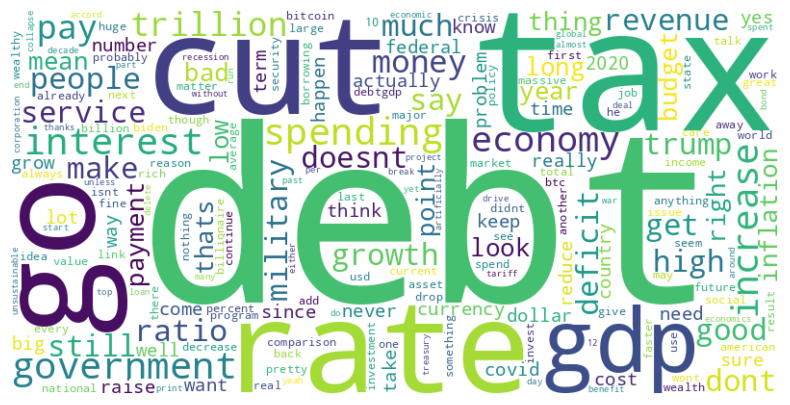

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Convert matrix to 1D array for easier manipulation

# Create a dictionary of words and their TF-IDF scores
word_scores = {word: score for word, score in zip(feature_names, tfidf_scores)}

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

### Topic Modeling

---
The topic modeling analysis using Latent Dirichlet Allocation (LDA) uncovered ten dominant themes from Reddit discussions on the U.S. national debt. The model was trained over 100 iterations, with the log-likelihood improving incrementally from **-8.3087** at iteration 10 to **-8.0204** at iteration 100, indicating better alignment between the model and the underlying data over time.

The identified topics provide a snapshot of the key themes within the discussion. **Topic 0** focused on financial terms like “pay,” “money,” “economy,” and “inflation,” reflecting conversations about economic stability. **Topic 1** highlighted terms such as “tax,” “debt,” “government,” and “cut,” suggesting discussions around fiscal policies and tax-related debates. Similarly, **Topic 2** emphasized terms like “debt,” “interest,” and “rate,” indicating interest in debt management and interest rate impacts.

Other notable topics include **Topic 3** with references to “world war” and “nation,” likely reflecting historical comparisons, and **Topic 6**, which centered on optimism for economic recovery with terms like “good,” “economy,” and “future.”


In [ ]:
pip install tomotopy

In [ ]:
import tomotopy as tp
import pandas as pd

training_data = df['processed_comment'].fillna('').tolist()  # Ensure no NaN values

# Number of topics to return
num_topics = 10
# Number of topic words to print out
num_topic_words = 6

# Initialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model
for text in training_data:
    model.add_doc(text.strip().split())

# Trains the model incrementally in chunks of iterations (10 in this case), up to a total of 100 iterations.
print("Topic Model Training...\n\n")
iterations = 10
total_iterations = 100
for i in range(0, total_iterations, iterations):
    model.train(iterations)  # Train the model for 10 iterations
    print(f'Iteration: {i + iterations}\tLog-likelihood: {model.ll_per_word}')  # Print the log-likelihood per word

# Topic Model Results
print("\nTopic Model Results:\n")
for topic_number in range(num_topics):
    topic_words = ' '.join(word for word, _ in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    print(f"✨ Topic {topic_number} ✨\n{topic_words}\n")


Topic Model Training...


Iteration: 10	Log-likelihood: -8.335159207884624
Iteration: 20	Log-likelihood: -8.1904033774897
Iteration: 30	Log-likelihood: -8.129381065464829
Iteration: 40	Log-likelihood: -8.085414482595352
Iteration: 50	Log-likelihood: -8.049164330321583
Iteration: 60	Log-likelihood: -8.025773204647397
Iteration: 70	Log-likelihood: -7.99201476853702
Iteration: 80	Log-likelihood: -8.003418960608027
Iteration: 90	Log-likelihood: -8.02113407064962
Iteration: 100	Log-likelihood: -7.992615481422714

Topic Model Results:

✨ Topic 0 ✨
cut tax spending service go people

✨ Topic 1 ✨
pay thats dollar dont state one

✨ Topic 2 ✨
trillion asset national deficit borrowing billionaire

✨ Topic 3 ✨
time since lot sure still know

✨ Topic 4 ✨
good year doesnt budget people military

✨ Topic 5 ✨
debt government u federal country real

✨ Topic 6 ✨
rate increase mean long value income

✨ Topic 7 ✨
billion currency almost way never comment

✨ Topic 8 ✨
gdp economy go growth bad ratio

✨ Top

### Sentiment Analysis

---
The sentiment analysis using the VADER model categorized Reddit comments into **positive**, **negative**, and **neutral** sentiments. From the pie chart, the results show that **43.5%** of comments were **positive**, while **37.2%** were **negative**, and **19.3%** were **neutral**. This distribution indicates that a significant portion of the public discussion reflects optimism or constructive engagement with the topic of the U.S. national debt, while a notable percentage conveys concerns and critical views.

The most frequent words in the **top 20 positive comments** included terms like "debt," "spending," "growth," and "tax," suggesting discussions that focus on fiscal growth, policy improvements, and economic prospects. These words align with the positive sentiment, indicating optimism about economic management and future prospects.

Conversely, the **bottom 20 negative comments** emphasized terms such as "debt," "cut," "pay," and "deficit." The frequent recurrence of "debt" and "deficit" highlights public concern over the sustainability of national debt and its economic consequences.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Ensure the VADER lexicon is available
nltk.download('vader_lexicon')

# Load your dataset
df = pd.read_csv('processed_comments.csv')

# Convert all comments to string and fill NaN values with an empty string
df['processed_comment'] = df['processed_comment'].astype(str).fillna('')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply VADER to each comment
df['sentiments'] = df['processed_comment'].apply(lambda x: sia.polarity_scores(str(x)))
df['compound'] = df['sentiments'].apply(lambda x: x['compound'])
df['comp_score'] = df['compound'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Count the number of each sentiment category
sentiment_counts = df['comp_score'].value_counts()
sentiment_counts

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,count
comp_score,
positive,124
negative,106
neutral,55


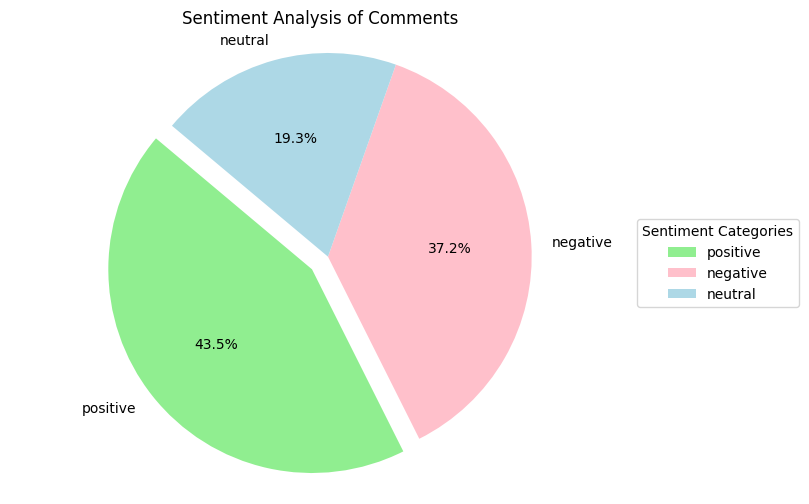

In [ ]:
# Plotting the sentiment distribution as a pie chart
colors = ['lightgreen', 'pink', 'lightblue']
explode = (0.1, 0, 0)  # explode the first slice (Positive)
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Sentiment Analysis of Comments')
plt.legend(sentiment_counts.index, title="Sentiment Categories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()
# Function to calculate sentiment scores and classify sentiment
def calculate_sentiment(text):
    scores = sentiment_analyzer.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

# Apply the function to calculate sentiment score
df['sentiment_score'] = df['processed_comment'].apply(calculate_sentiment)

# Categorize sentiment based on compound score
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# Clean newline characters in 'processed_comment'
df['processed_comment'] = df['processed_comment'].replace('\n', ' ', regex=True)

# Sort the DataFrame by sentiment score in descending order
df.sort_values(by='sentiment_score', ascending=False).head(20)

,comment_id,author,date,comment,score,cleaned_text,processed_comment,sentiments,compound,comp_score,sentiment_score,sentiment
8,lylyogk,improvement-pug,2024-11-23 17:52:50,It does this every day. Debt to go ratio has b...,6,It does this every day Debt to go ratio has be...,every day debt go ratio decline really importa...,"{'neg': 0.062, 'neu': 0.424, 'pos': 0.514, 'co...",0.9523,positive,0.9523,Positive
162,lysbu40,Massive-Vacation5119,2024-11-24 19:28:25,"Again, it depends. If you’re spending 20% of y...",2,Again it depends If youre spending 20 of your ...,depends spending 20 income interest huge loan ...,"{'neg': 0.05, 'neu': 0.499, 'pos': 0.451, 'com...",0.9509,positive,0.9509,Positive
111,lymgt4k,Limon-Pepino,2024-11-23 19:28:47,"Agreed, but im confused where you think i didn...",2,Agreed but im confused where you think i didnt...,agree confuse think didnt consider mention cli...,"{'neg': 0.078, 'neu': 0.53, 'pos': 0.392, 'com...",0.9432,positive,0.9432,Positive
184,lyno5rl,Yvaelle,2024-11-23 23:36:33,"Yes they are. For starters, 40% of mandatory s...",3,Yes they are For starters 40 of mandatory spen...,yes starter 40 mandatory spending social secur...,"{'neg': 0.045, 'neu': 0.726, 'pos': 0.228, 'co...",0.9244,positive,0.9244,Positive
250,lyn1bay,The_Cheeseman83,2024-11-23 21:22:14,"Fair point, but there is a lot to be said abou...",2,Fair point but there is a lot to be said about...,fair point lot say indirect benefit soft power...,"{'neg': 0.092, 'neu': 0.584, 'pos': 0.323, 'co...",0.8971,positive,0.8903,Positive
190,lym88cs,Throw_uh-whey,2024-11-23 18:43:04,1 percentage point growth in a developed econo...,2,1 percentage point growth in a developed econo...,1 percentage point growth developed economy bi...,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.8885,positive,0.8885,Positive
160,lynqfvh,NotAlNiani,2024-11-23 23:50:21,Good luck seizing 10% of all assets in the US ...,1,Good luck seizing 10 of all assets in the US i...,good luck seize 10 asset u include people home...,"{'neg': 0.142, 'neu': 0.628, 'pos': 0.23, 'com...",0.8007,positive,0.8870,Positive
5,lym8o4b,ItsOnlyaFewBucks,2024-11-23 18:45:16,I am seriously starting to think the reason or...,16,I am seriously starting to think the reason or...,seriously start think reason organize wealth a...,"{'neg': 0.047, 'neu': 0.587, 'pos': 0.366, 'co...",0.8860,positive,0.8860,Positive
251,lynjyss,The_Cheeseman83,2024-11-23 23:10:55,I don’t think the military really has much to ...,2,I dont think the military really has much to d...,dont think military really much dominance doll...,"{'neg': 0.152, 'neu': 0.576, 'pos': 0.272, 'co...",0.8775,positive,0.8775,Positive
189,lym8yl2,Throw_uh-whey,2024-11-23 18:46:48,"Sure, that would be a great start - but that i...",4,Sure that would be a great start but that isn...,sure great start isnt current trajectory defic...,"{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'comp...",0.9302,positive,0.8707,Positive


In [ ]:
df.sort_values(by='sentiment_score', ascending=True)[:20]

,comment_id,author,date,comment,score,cleaned_text,processed_comment,sentiments,compound,comp_score,sentiment_score,sentiment
109,lyp4xvr,markth_wi,2024-11-24 05:28:02,"Of Course. One can, without a great deal of ex...",2,Of Course One can without a great deal of exag...,course one without great deal exaggeration see...,"{'neg': 0.236, 'neu': 0.62, 'pos': 0.144, 'com...",-0.9847,negative,-0.9807,Negative
72,lyn9y3j,Material-Macaroon298,2024-11-23 22:11:24,Interest payments are huge for the debt alread...,2,Interest payments are huge for the debt alread...,interest payment huge debt already get big giv...,"{'neg': 0.382, 'neu': 0.512, 'pos': 0.105, 'co...",-0.9753,negative,-0.9753,Negative
275,lyumc39,S1artibartfast666,2024-11-25 03:18:00,My point is that we shouldn't be talking perce...,1,My point is that we shouldnt be talking percen...,point shouldnt talk percentage stuff much rema...,"{'neg': 0.287, 'neu': 0.664, 'pos': 0.049, 'co...",-0.9100,negative,-0.9189,Negative
15,lyns75t,vt2022cam,2024-11-24 00:01:05,Trump’s (and Bush’s) tax cut and wars did this...,3,Trumps and Bushs tax cut and wars did this The...,trump bush tax cut war people hypocritically c...,"{'neg': 0.589, 'neu': 0.325, 'pos': 0.085, 'co...",-0.9081,negative,-0.9081,Negative
263,lyw913g,M0therN4ture,2024-11-25 12:21:58,Isn't happening and has never happened in hist...,1,Isnt happening and has never happened in histo...,isnt happen never happen history look every ma...,"{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'comp...",-0.8979,negative,-0.9035,Negative
17,lyny794,Sleepy_Wayne_Tracker,2024-11-24 00:37:47,"It was $24 trillion when Trump took office, $3...",1,It was 24 trillion when Trump took office 32 t...,24 trillion trump take office 32 trillion left...,"{'neg': 0.253, 'neu': 0.694, 'pos': 0.052, 'co...",-0.9001,negative,-0.9001,Negative
147,lylxl8q,Beautiful-Health-976,2024-11-23 17:47:11,People must look at the refinancing of debt an...,5,People must look at the refinancing of debt an...,people must look refinance debt result interes...,"{'neg': 0.352, 'neu': 0.44, 'pos': 0.208, 'com...",-0.8779,negative,-0.8779,Negative
77,lynzlu1,Cutlasss,2024-11-24 00:46:14,Not nearly that bipartisan. GW Bush cut taxes ...,1,Not nearly that bipartisan GW Bush cut taxes t...,nearly bipartisan gw bush cut tax twice start ...,"{'neg': 0.416, 'neu': 0.516, 'pos': 0.068, 'co...",-0.8689,negative,-0.8689,Negative
4,lyn1c8e,Full-Discussion3745,2024-11-23 21:22:23,If you add all the states debt onto that it wi...,11,If you add all the states debt onto that it wi...,add state debt onto 41 trillion usd difficult ...,"{'neg': 0.454, 'neu': 0.464, 'pos': 0.082, 'co...",-0.8555,negative,-0.8555,Negative
44,lynzjbu,MAGA_Trudeau,2024-11-24 00:45:52,A lot of states are constitutionally required ...,4,A lot of states are constitutionally required ...,lot state constitutionally require balance bud...,"{'neg': 0.331, 'neu': 0.669, 'pos': 0.0, 'comp...",-0.8360,negative,-0.8360,Negative


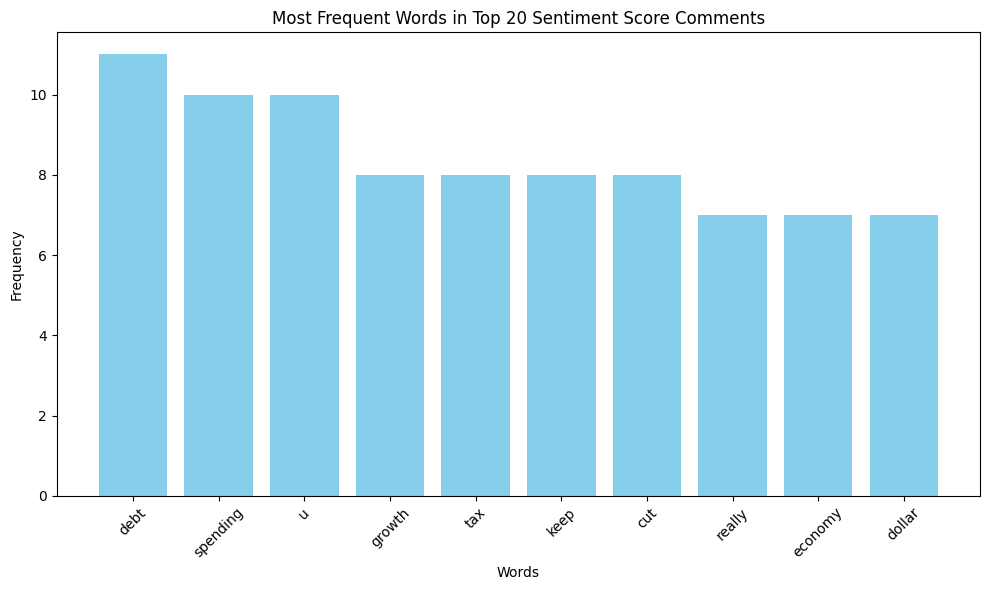

In [ ]:
from collections import Counter
import re

# Function to calculate sentiment scores
def calculate_sentiment(text):
    scores = sentiment_analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['processed_comment'].apply(calculate_sentiment)

# Sort and get the top 20 comments by sentiment score
top_20_df = df.sort_values(by='sentiment_score', ascending=False).head(20)

# Function to tokenize and clean text
def tokenize_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    return text.split()

# Tokenize all top 20 comments and count word frequencies
all_words = []
for comment in top_20_df['processed_comment']:
    all_words.extend(tokenize_text(comment))

# Count word frequencies
word_freq = Counter(all_words)

# Get the most common words (top 10)
most_common_words = word_freq.most_common(10)

# Prepare data for the bar graph
words, frequencies = zip(*most_common_words)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in Top 20 Sentiment Score Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


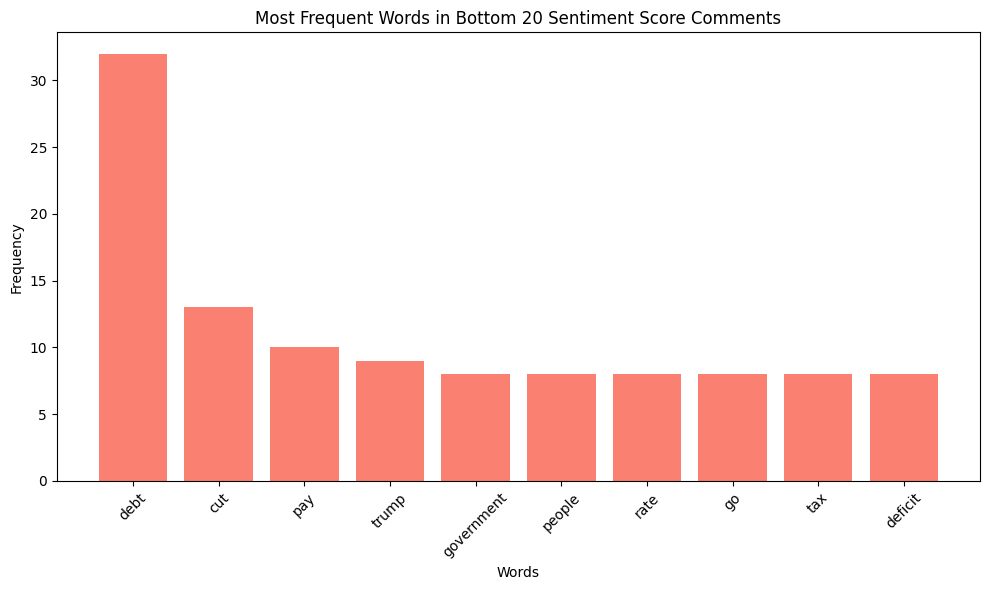

In [ ]:
# Apply sentiment analysis
df['sentiment_score'] = df['processed_comment'].apply(calculate_sentiment)

# Sort and get the bottom 20 comments by sentiment score
bottom_20_df = df.sort_values(by='sentiment_score', ascending=True).head(20)

# Function to tokenize and clean text
def tokenize_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    return text.split()

# Tokenize all bottom 20 comments and count word frequencies
all_words = []
for comment in bottom_20_df['processed_comment']:
    all_words.extend(tokenize_text(comment))

# Count word frequencies
word_freq = Counter(all_words)

# Get the most common words (top 10)
most_common_words = word_freq.most_common(10)

# Prepare data for the bar graph
words, frequencies = zip(*most_common_words)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='salmon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in Bottom 20 Sentiment Score Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Discussion & Conclusion

---

This analysis of Reddit discussions on the U.S. national debt in 2024 provides valuable insights into public perceptions and confirms that the overall sentiment was **more positive** than initially hypothesized. The sentiment analysis results, as reflected in the pie chart, showed that **43.5%** of comments were positive, while only **37.2%** were negative, with the remaining **19.3%** neutral. This suggests that, despite concerns about debt sustainability, a significant portion of the discussion conveys optimism about economic management, growth prospects, and fiscal strategies.

Key terms identified through TF-IDF analysis, such as “debt,” “spending,” “growth,” and “tax,” highlight the central focus of the discourse on government spending, taxation policies, and economic recovery. The dominance of words like “growth” and “economy” in positive comments indicates that many users perceive fiscal policies as beneficial for addressing economic challenges. Topic modeling further emphasized themes of economic stability, borrowing, and future recovery, reinforcing the positive outlook of a large portion of users.

These findings challenge the initial hypothesis, which predicted a predominantly negative sentiment driven by concerns over debt sustainability. Instead, the analysis reveals a more balanced discussion, with optimism prevailing among a notable share of participants.

However, the scope of this study remains limited to a single Reddit thread, which may not fully capture broader public discourse. Additionally, while VADER sentiment analysis is effective, it may not fully interpret nuanced language or sarcasm often present in Reddit comments.  

In conclusion, this study highlights a more positive public outlook on the U.S. national debt than expected, suggesting confidence in economic policies and recovery efforts. These insights underscore the importance of monitoring public sentiment to inform communication strategies, address concerns, and encourage constructive dialogue on fiscal sustainability.

# Future Study

---


To build on these findings, future research can broaden the scope of the analysis in several ways. First, expanding data collection to include platforms like Twitter, Facebook, or other online forums would provide a more comprehensive understanding of public sentiment across diverse audiences. Second, improving the sentiment analysis process with more advanced natural language processing (NLP) techniques would enhance the ability to detect sarcasm, irony, and nuanced language often present in Reddit discussions.

Another area for future exploration is conducting a time-based analysis to track how public sentiment changes in response to significant economic events or policy announcements. Additionally, incorporating user demographic data, such as age, geographic location, or political affiliation, could provide valuable insights into how different groups perceive and engage with discussions on national debt. These enhancements would allow for a more robust and detailed understanding of public attitudes toward fiscal challenges and economic policies.

# Reference

---
* Cathyzyx. (2023). Analysis of the dynamics of sentiments toward Ukrainian aid in the US. https://github.com/Cathy-zyx/Text_Analysis_Final_Project_Ukrainian_aid/blob/Cathy-zyx-patch-1/Sentiment_analysis_on_Ukrainian_aid.ipynb

* ClaraLyu.(2023).Public’s Sentiment Analysis on Twitter to Texas’ Six-week Ban and Overturning of Roe v. Wade. https://github.com/ClaraLyu/Final_Project_ml4521/blob/main/FINAL%20PROJECT%20(2).ipynb

* Kellyphw.(2023). Reddit Analysis on Quiet Quitting. https://github.com/kellyphw/Quiet-Quitting-Reddit-Project/blob/main/Reddit%20Analysis%20on%20Quiet%20Quitting%20(Heewon).ipynb

* Professor Krisel's lecture notes
* R/economics on reddit: US National Debt Hits record $34 trillion | CNN business. (n.d.). https://www.reddit.com/r/Economics/comments/18xpilk/us_national_debt_hits_record_34_trillion_cnn/